# Modelos de Regresión Lineal

## Modelo con datos simulados
* y = a + b * x
* X: 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuida según una (0, 0.8)

In [77]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [47]:
x = 1.5 + 2.5 * np.random.randn(100)

In [48]:
res = 0 + 0.8 * np.random.randn(100) 

In [49]:
y_pred = 5 + 1.9 * x

In [50]:
y_act = 5 + 1.9 * x + res

In [51]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [52]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list 
    }
)

In [53]:
data.head()

,x,y_actual,y_prediccion
0,2.450249,8.993164,9.655473
1,4.387057,14.026355,13.335409
2,-1.632538,2.940511,1.898178
3,2.980913,10.206943,10.663736
4,0.582969,4.975728,6.107641


In [54]:
import matplotlib.pyplot as plt

In [55]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5,1,'Valor actual vs predicción')

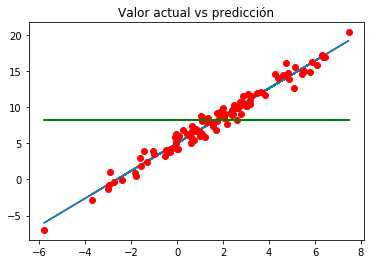

In [59]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs predicción")

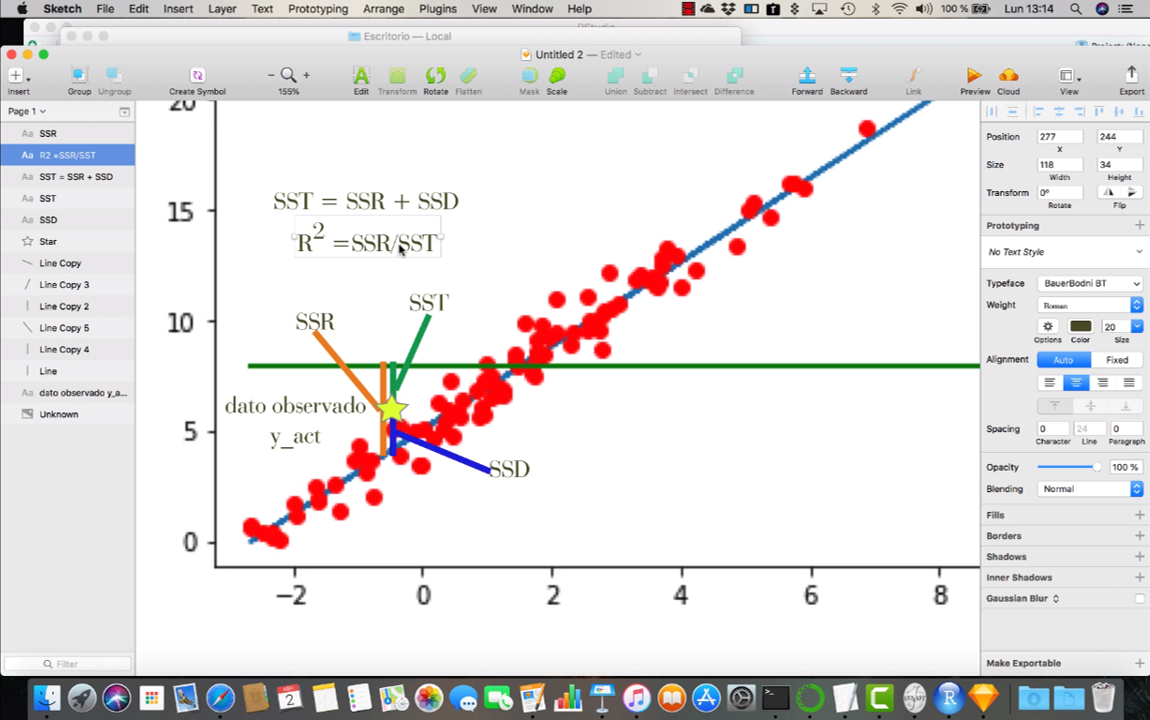

In [93]:
Image(filename='resources/r2.png')

In [61]:
data['SSR'] = (data['y_prediccion'] - np.mean(y_act))**2
data['SSD'] = (data['y_prediccion'] - data['y_actual'])**2
data['SST'] = (data['y_actual'] - np.mean(y_act))**2

In [62]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.450249,8.993164,9.655473,2.225447,0.438653,0.688044
1,4.387057,14.026355,13.335409,26.746789,0.477407,34.370969
2,-1.632538,2.940511,1.898178,39.256512,1.086459,27.281488
3,2.980913,10.206943,10.663736,6.250281,0.208660,4.174924
4,0.582969,4.975728,6.107641,4.227295,1.281227,10.163035


### ¿Cómo es la predicción de buena?
* SSD + SSR = SSR
* SST: Variabilidad de los datos con respecto de su media
* SSD: Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (erroes que deberían seguir una distribución normal)
* SSR: Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2: SSR / SST, coeficiente de determinación entre 0 y 1

In [64]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [65]:
SSR

2292.5694141883687

In [66]:
SSD

68.20626610059092

In [67]:
SST

2367.228789760971

In [68]:
SSR + SSD

2360.7756802889594

In [69]:
R2 = SSR/SST

In [70]:
R2

0.9684612759461493

(array([ 3.,  5., 13., 12., 16., 18., 20.,  8.,  3.,  2.]),
 array([-2.01196375, -1.60583803, -1.1997123 , -0.79358657, -0.38746084,
         0.01866488,  0.42479061,  0.83091634,  1.23704207,  1.64316779,
         2.04929352]),
 <a list of 10 Patch objects>)

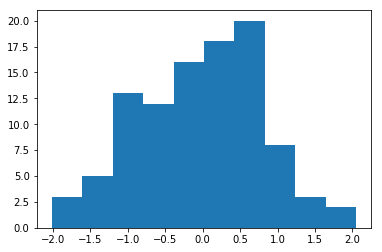

In [76]:
plt.hist(data['y_prediccion'] - data['y_actual'])

### Obteniendo la recta de regresión
* y = a + b * x
* b = sum(xi - x_m) * (y_i - y_m) / sum(x1 - x_m) ^ 2)
* a = y_m - b * x_m

In [81]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean, y_mean

(1.6488903807219442, 8.16367947049411)

In [83]:
data['beta_num'] = (data['x'] - x_mean) * (data['y_actual'] - y_mean)
data['beta_den'] = (data['x'] - x_mean)**2

In [88]:
beta = sum(data['beta_num']) / sum(data['beta_den'])

In [89]:
alpha = y_mean - beta * x_mean

In [90]:
alpha, beta

(5.026248805345288, 1.9027527250023375)

El modelo lineal obtenido por regresión es: 
y = 5.026248805345288 + 1.9027527250023375 * x

In [91]:
data['y_model'] = alpha + beta * data['x']

In [92]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_num,beta_den,y_model
0,2.450249,8.993164,9.655473,2.225447,0.438653,0.688044,0.664714,0.642175,9.688466
1,4.387057,14.026355,13.335409,26.746789,0.477407,34.370969,16.052987,7.497559,13.373734
2,-1.632538,2.940511,1.898178,39.256512,1.086459,27.281488,17.139453,10.767772,1.919933
3,2.980913,10.206943,10.663736,6.250281,0.208660,4.174924,2.721674,1.774285,10.698190
4,0.582969,4.975728,6.107641,4.227295,1.281227,10.163035,3.398106,1.136189,6.135494


In [96]:
SSR = sum((data['y_model'] - y_mean)**2)
SSD = sum((data['y_model'] - data['y_actual'])**2)
SST = sum((data['y_actual'] - y_mean)**2)

In [97]:
SSR, SSD, SST

(2299.122124168544, 68.10666559242475, 2367.228789760971)

In [100]:
R2 = SSR/SST
R2

0.9712293691733515

Text(0.5,1,'Valor actual vs predicción')

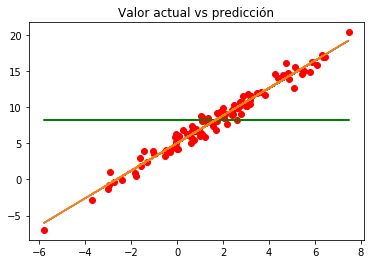

In [102]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data['x'], data['y_model'])
plt.title("Valor actual vs predicción")